# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib
from google.colab import files
plt.style.use('ggplot')
sns.set(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')

# **2. Memuat Dataset dari Hasil Clustering**
Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# Gunakan dataset hasil clustering yang memiliki fitur Target
# Silakan gunakan dataset data_clustering jika tidak menerapkan Interpretasi Hasil Clustering [Advanced]
# Silakan gunakan dataset data_clustering_inverse jika menerapkan Interpretasi Hasil Clustering [Advanced]
uploaded = files.upload()

Saving data_clustering_inverse.csv to data_clustering_inverse.csv


In [3]:
# Tampilkan 5 baris pertama dengan function head.
df_classification = pd.read_csv('data_clustering_inverse.csv')
print("Dataset Hasil Clustering:")
df_classification.head()

Dataset Hasil Clustering:


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionAmount_Bin_Encoded,AccountBalance_Bin_Encoded,Target,ClusterLabel
0,-0.970546,1.419862,-0.548393,-0.204629,-0.000315,4,0,2,Transaksi Tinggi
1,0.268963,1.307715,0.307960,-0.204629,2.218381,0,3,0,Transaksi Sedang
2,-0.586526,-1.439874,-0.905207,-0.204629,-1.024091,1,1,1,Transaksi Rendah
3,-0.387294,-1.047361,-1.347656,-0.204629,0.886694,2,3,0,Transaksi Sedang
4,-0.703375,-1.495947,0.750409,-0.204629,-1.111505,1,1,1,Transaksi Rendah


In [4]:
# Cek missing value dan duplikasi datanya
print(f'Missing values: {df_classification.isna().sum().sum()}')
print(f'Duplicated values: {df_classification.duplicated().sum()}')

Missing values: 0
Duplicated values: 0


In [5]:
print("\nCluster Distribution:")
print(df_classification['ClusterLabel'].value_counts())


Cluster Distribution:
ClusterLabel
Transaksi Rendah    915
Transaksi Tinggi    614
Transaksi Sedang    510
Name: count, dtype: int64


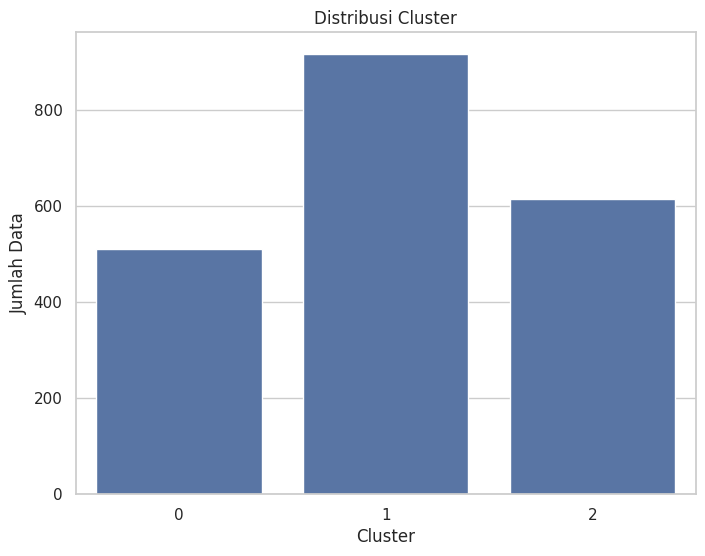

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=df_classification)
plt.title('Distribusi Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Data')
plt.show()

# **3. Data Splitting**
Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [7]:
# Menggunakan train_test_split() untuk melakukan pembagian dataset.
X = df_classification.drop('Target', axis=1)
y = df_classification['Target']

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

print(f"Jumlah total data: {len(df_classification)}")
print(f"Distribusi kelas target:")
print(y.value_counts())
print("\nDistribusi kelas target (%):")
print(y.value_counts(normalize=True) * 100)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nJumlah data training: {len(X_train)}")
print(f"Jumlah data testing: {len(X_test)}")
print(f"Distribusi kelas pada data training:")
print(pd.Series(y_train).value_counts())
print(f"Distribusi kelas pada data testing:")
print(pd.Series(y_test).value_counts())

Jumlah total data: 2039
Distribusi kelas target:
Target
1    915
2    614
0    510
Name: count, dtype: int64

Distribusi kelas target (%):
Target
1    44.874939
2    30.112800
0    25.012261
Name: proportion, dtype: float64

Jumlah data training: 1631
Jumlah data testing: 408
Distribusi kelas pada data training:
Target
1    732
2    491
0    408
Name: count, dtype: int64
Distribusi kelas pada data testing:
Target
1    183
2    123
0    102
Name: count, dtype: int64


# **4. Membangun Model Klasifikasi**
Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Menggunakan algoritma klasifikasi yaitu Decision Tree.
2. Latih model menggunakan data yang sudah dipisah.

In [8]:
# Buatlah model klasifikasi menggunakan Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Apply preprocessing to the training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Latih model menggunakan data yang sudah diproses
dt_model.fit(X_train_processed, y_train)

# Memprediksi hasil
y_pred = dt_model.predict(X_test_processed)

# Menampilkan hasil evaluasi
print("\nHasil Evaluasi Model Decision Tree:")
print(classification_report(y_test, y_pred))


Hasil Evaluasi Model Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       183
           2       1.00      1.00      1.00       123

    accuracy                           1.00       408
   macro avg       1.00      1.00      1.00       408
weighted avg       1.00      1.00      1.00       408



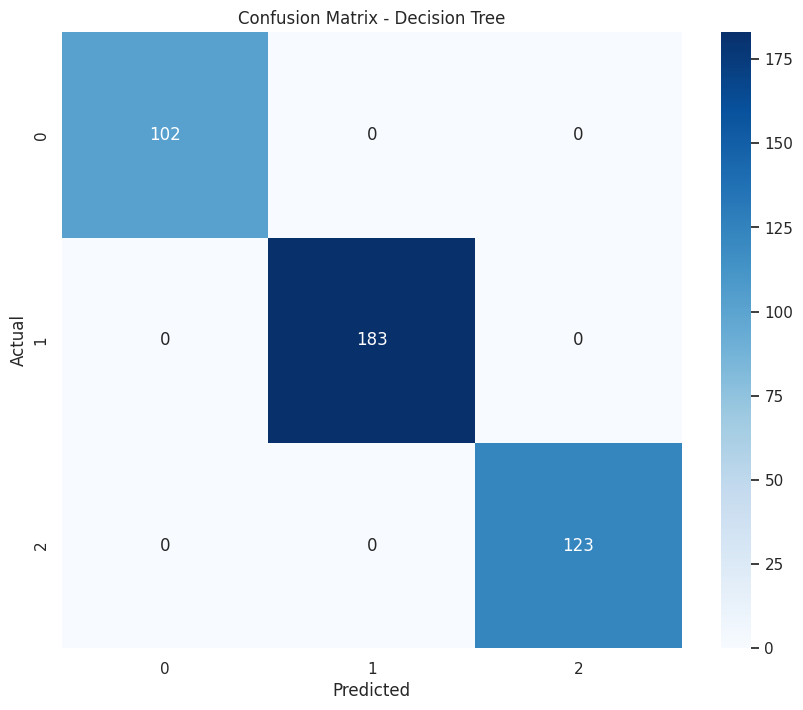

In [9]:
cm_dt = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(df_classification['Target'].unique()), yticklabels=sorted(df_classification['Target'].unique()))
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [10]:
# Menyimpan Model
# import joblib
# joblib.dump(model, 'decision_tree_model.h5')
joblib.dump(dt_model, 'decision_tree_model.h5')
print("Model Decision Tree berhasil disimpan sebagai 'decision_tree_model.h5'")

Model Decision Tree berhasil disimpan sebagai 'decision_tree_model.h5'


# **5. Memenuhi Kriteria Skilled dan Advanced dalam Membangun Model Klasifikasi**



**Biarkan kosong jika tidak menerapkan kriteria skilled atau advanced**

In [11]:
# Melatih model menggunakan algoritma klasifikasi selain Decision Tree.
# Membuat dan melatih model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Apply preprocessing to the training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Latih model menggunakan data yang sudah diproses
rf_model.fit(X_train_processed, y_train)

# Memprediksi hasil
y_pred_rf = rf_model.predict(X_test_processed)

# Menampilkan hasil evaluasi
print("\nHasil Evaluasi Model Random Forest:")
print(classification_report(y_test, y_pred_rf))


Hasil Evaluasi Model Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       183
           2       1.00      1.00      1.00       123

    accuracy                           1.00       408
   macro avg       1.00      1.00      1.00       408
weighted avg       1.00      1.00      1.00       408



In [12]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.
print("\nHasil Evaluasi Model Random Forest:")
print(classification_report(y_test, y_pred_rf))


Hasil Evaluasi Model Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       183
           2       1.00      1.00      1.00       123

    accuracy                           1.00       408
   macro avg       1.00      1.00      1.00       408
weighted avg       1.00      1.00      1.00       408



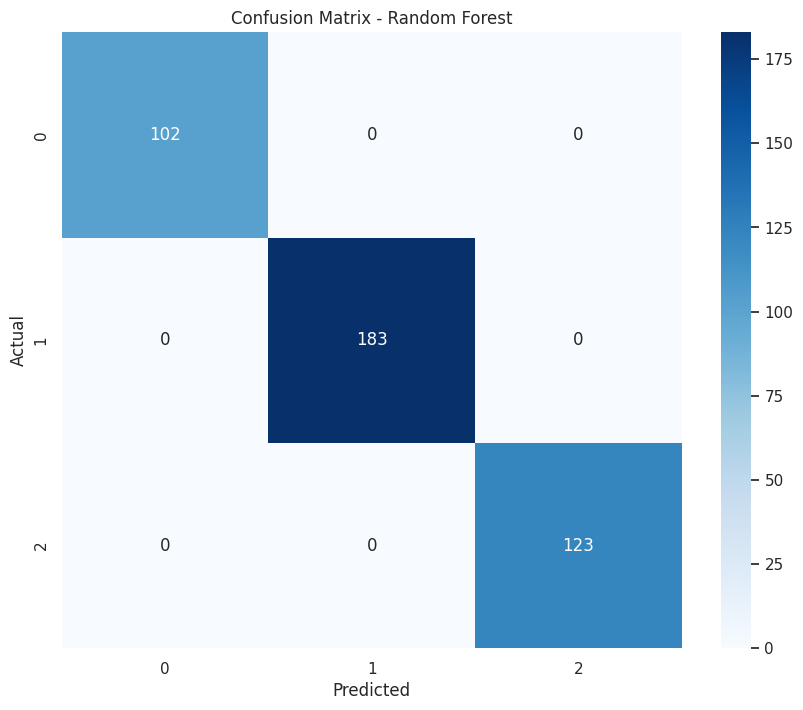

In [13]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(df_classification['Target'].unique()), yticklabels=sorted(df_classification['Target'].unique()))
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [14]:
# Menyimpan Model Selain Decision Tree
# Model ini bisa lebih dari satu
# import joblib
# joblib.dump(___, 'explore__classification.h5')
joblib.dump(rf_model, 'explore_random_forest_classification.h5')

['explore_random_forest_classification.h5']

Hyperparameter Tuning Model

Pilih salah satu algoritma yang ingin Anda tuning

In [15]:
# Lakukan Hyperparameter Tuning dan Latih ulang.
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Apply preprocessing to the training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5)
grid_search_dt.fit(X_train_processed, y_train)

# Mendapatkan model terbaik
best_dt_model = grid_search_dt.best_estimator_

In [16]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada algoritma yang sudah dituning.
# Apply preprocessing to the testing data
X_test_processed = preprocessor.transform(X_test)

y_pred_best_dt = best_dt_model.predict(X_test_processed)

print("\nHasil Evaluasi Model Decision Tree setelah Tuning:")
print(classification_report(y_test, y_pred_best_dt))


Hasil Evaluasi Model Decision Tree setelah Tuning:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       183
           2       1.00      1.00      1.00       123

    accuracy                           1.00       408
   macro avg       1.00      1.00      1.00       408
weighted avg       1.00      1.00      1.00       408



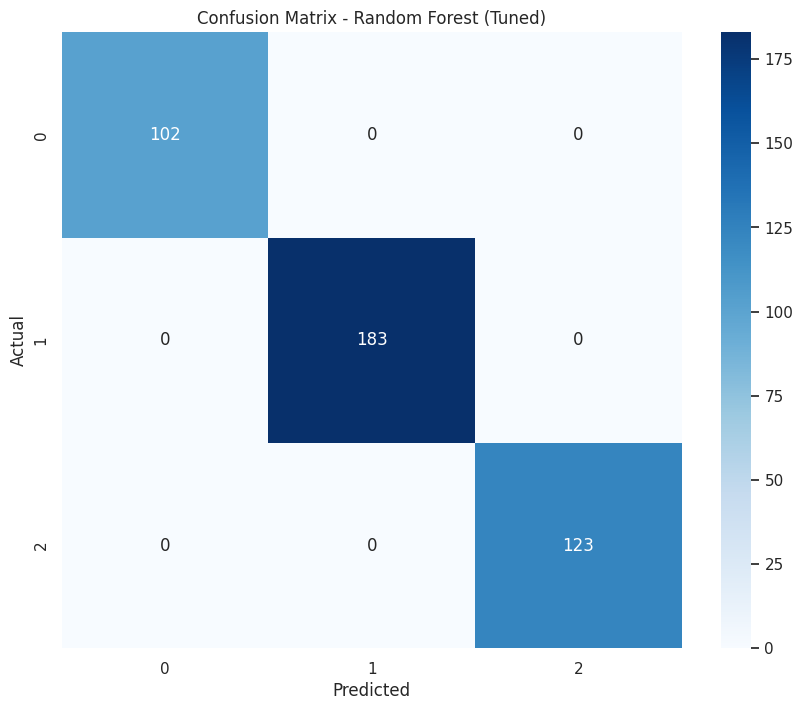

In [17]:
cm_dt_tuned = confusion_matrix(y_test, y_pred_best_dt)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_dt_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(df_classification['Target'].unique()), yticklabels=sorted(df_classification['Target'].unique()))
plt.title('Confusion Matrix - Random Forest (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [18]:
# Menyimpan Model hasil tuning
# import joblib
# joblib.dump(model_dt, 'tuning_classification.h5')
joblib.dump(best_dt_model, 'tuning_classification.h5')

['tuning_classification.h5']